## Criando os nomes

In [120]:
import pandas as pd
import numpy as np

In [121]:
BaseF = pd.read_json('http://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
BaseM = pd.read_json('http://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [122]:
join = [BaseF, BaseM]
new_base = pd.concat(join)[['nome','sexo']]
new_base.index = range(len(new_base))

## CRIANDO OS IDs

In [123]:
new_base['_id'] = np.random.permutation(len(new_base)) + 100000

In [124]:
new_base

,nome,sexo,_id
0,MARIA,F,100023
1,ANA,F,100184
2,FRANCISCA,F,100308
3,ANTONIA,F,100390
4,ADRIANA,F,100137
...,...,...,...
395,WALTER,M,100282
396,ARLINDO,M,100187
397,MICHAEL,M,100102
398,ALVARO,M,100025


In [125]:
dominioEmail = ['@gmail.com', '@yahoo.com.br', '@outlook.com', '@oul.com.br', '@bol.com.br', '@live.com', '@qwst.co']
new_base['dominio'] = np.random.choice(dominioEmail, len(new_base)) # faz um sortei aleatorio na lista acima de acordo com o número de linhas na base;

In [126]:
new_base['email'] = new_base.nome.str.cat(new_base.dominio).str.lower()

In [127]:
new_base

,nome,sexo,_id,dominio,email
0,MARIA,F,100023,@yahoo.com.br,maria@yahoo.com.br
1,ANA,F,100184,@bol.com.br,ana@bol.com.br
2,FRANCISCA,F,100308,@oul.com.br,francisca@oul.com.br
3,ANTONIA,F,100390,@oul.com.br,antonia@oul.com.br
4,ADRIANA,F,100137,@qwst.co,adriana@qwst.co
...,...,...,...,...,...
395,WALTER,M,100282,@qwst.co,walter@qwst.co
396,ARLINDO,M,100187,@qwst.co,arlindo@qwst.co
397,MICHAEL,M,100102,@oul.com.br,michael@oul.com.br
398,ALVARO,M,100025,@live.com,alvaro@live.com


## Criando a tabela cursos.

In [128]:
cursos = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [129]:
cursos = cursos[0]

## Alterando o index, nome da columa e colocando id na table cursos

In [130]:
cursos.rename(columns={'Nome do curso': 'Nome_Curso'}, inplace=True)

In [131]:
cursos['_idCurso'] = np.random.permutation(len(cursos)) +1

In [132]:
cursos = cursos.set_index('_idCurso')  # setar [ _idCurso ] como index da base

In [133]:
cursos.head()

,Nome_Curso
_idCurso,
2,Lógica de programação
7,Java para Web
16,C# para Web
17,Ruby on Rails
1,Cursos de Python


## Matriculando so alunos nos cursos

In [134]:
new_base['Matriculas'] = np.ceil(np.random.exponential(size=len(new_base)) * 1.5).astype(int)  # função que nomea a quantidade de cursos por alunos

In [135]:
new_base.head()

,nome,sexo,_id,dominio,email,Matriculas
0,MARIA,F,100023,@yahoo.com.br,maria@yahoo.com.br,1
1,ANA,F,100184,@bol.com.br,ana@bol.com.br,2
2,FRANCISCA,F,100308,@oul.com.br,francisca@oul.com.br,1
3,ANTONIA,F,100390,@oul.com.br,antonia@oul.com.br,1
4,ADRIANA,F,100137,@qwst.co,adriana@qwst.co,1


In [136]:
import seaborn as sns

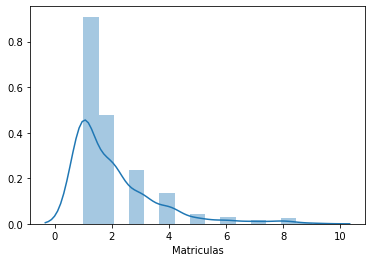

In [137]:
sns.distplot(new_base.Matriculas)

In [138]:
new_base.Matriculas.value_counts()

1    194
2    102
3     50
4     29
5      9
6      6
8      5
7      4
9      1
Name: Matriculas, dtype: int64

## Selecionando cursos

In [141]:
All_matricula = []
x = np.random.rand(20)
prob = x / sum(x)

In [142]:
for index, row in new_base.iterrows():  # Retorna linha a linha
    id = row._id
    matricula = row.Matriculas
    for i in range(matricula):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        All_matricula.append(mat)
        
Matriculas = pd.DataFrame(All_matricula, columns=['Id_Aluno', 'Id_Cursos'])

In [144]:
Matriculas.head()

,Id_Aluno,Id_Cursos
0,100023,13
1,100184,10
2,100184,8
3,100308,17
4,100390,14


In [149]:
Matricular_cursos = Matriculas.groupby('Id_Cursos').count().join(cursos['Nome_Curso']).rename(columns={'Id_Aluno': 'Qtds_Aluno'})

In [151]:
Matricular_cursos.head()

,Qtds_Aluno,Nome_Curso
Id_Cursos,,
1,71,Cursos de Python
2,39,Lógica de programação
3,6,PHP com MySql
4,57,Persistência com .NET
5,57,Análise de dados


## Saida em Diferentes formados

In [153]:
Matricular_cursos.to_csv('Matricular_cursos.csv', index=False)

## Criando banco SQL

In [156]:
from sqlalchemy import create_engine, MetaData, Table

In [158]:
engine = create_engine('sqlite:///:memory:')  # Para salvar na memoria

In [159]:
engine

Engine(sqlite:///:memory:)

In [160]:
type(engine)

sqlalchemy.engine.base.Engine

In [162]:
Matricular_cursos.to_sql('Matricula', engine) #

In [166]:
Matricular_cursos.head()

,Qtds_Aluno,Nome_Curso
Id_Cursos,,
1,71,Cursos de Python
2,39,Lógica de programação
3,6,PHP com MySql
4,57,Persistência com .NET
5,57,Análise de dados


In [163]:
print(engine.table_names())

['Matricula']


## Buscando no banco SQL

In [167]:
query = 'SELECT * FROM Matricula WHERE Qtds_Aluno < 20'

In [168]:
pd.read_sql(query, engine)

,Id_Cursos,Qtds_Aluno,Nome_Curso
0,3,6,PHP com MySql
1,6,9,.NET para web
2,12,10,Estatística básica
3,15,9,Novas integrações com Java
4,20,6,Preparatório para certificação Java


In [170]:
pd.read_sql_table('Matricula', engine, columns=['Qtds_Aluno','Nome_Curso'])

,Qtds_Aluno,Nome_Curso
0,71,Cursos de Python
1,39,Lógica de programação
2,6,PHP com MySql
3,57,Persistência com .NET
4,57,Análise de dados
5,9,.NET para web
6,35,Java para Web
7,79,Hardware básico
8,27,Orientação objetos com Java
9,96,Internet das coisas


In [171]:
Muitas_matriculas = pd.read_sql_table('Matricula', engine, columns=['Qtds_Aluno','Nome_Curso'])

In [172]:
Muitas_matriculas.head()

,Qtds_Aluno,Nome_Curso
0,71,Cursos de Python
1,39,Lógica de programação
2,6,PHP com MySql
3,57,Persistência com .NET
4,57,Análise de dados


In [173]:
Muitas_matriculas.query('Qtds_Aluno > 60')

,Qtds_Aluno,Nome_Curso
0,71,Cursos de Python
7,79,Hardware básico
9,96,Internet das coisas
13,90,Boas práticas em Java


## Escrevendo no banco

In [174]:
Muitas_matriculas.to_sql('Muitas_matriculas', con=engine)

In [176]:
print(engine.table_names())

['Matricula', 'Muitas_matriculas']


In [178]:
Matriculas

,Id_Aluno,Id_Cursos
0,100023,13
1,100184,10
2,100184,8
3,100308,17
4,100390,14
...,...,...
817,100187,4
818,100102,2
819,100102,10
820,100025,16


In [195]:
id_curso = 12
Nest_steam = Matriculas.query('Id_Cursos == {}'.format(id_curso))

In [184]:
new_base
# Nest_steam

,nome,sexo,_id,dominio,email,Matriculas
0,MARIA,F,100023,@yahoo.com.br,maria@yahoo.com.br,1
1,ANA,F,100184,@bol.com.br,ana@bol.com.br,2
2,FRANCISCA,F,100308,@oul.com.br,francisca@oul.com.br,1
3,ANTONIA,F,100390,@oul.com.br,antonia@oul.com.br,1
4,ADRIANA,F,100137,@qwst.co,adriana@qwst.co,1
...,...,...,...,...,...,...
395,WALTER,M,100282,@qwst.co,walter@qwst.co,3
396,ARLINDO,M,100187,@qwst.co,arlindo@qwst.co,2
397,MICHAEL,M,100102,@oul.com.br,michael@oul.com.br,2
398,ALVARO,M,100025,@live.com,alvaro@live.com,1


In [189]:
Nest_steam.set_index('Id_Aluno').join(new_base.set_index('_id'))['nome']  # Juntando duas tabelas pelo ID

Id_Aluno
100167      JANAINA
100021      LUCIENE
100381       LILIAN
100306    CONCEICAO
100045        IRACI
100383       ROSANE
100374    ALEXANDRE
100053      LUCIANO
100185        ARTUR
100269       ISRAEL
Name: nome, dtype: object

In [191]:
Nest_steam.set_index('Id_Aluno').join(new_base.set_index('_id'))['nome'].to_frame()  # Juntando duas tabelas pelo ID

,nome
Id_Aluno,
100167,JANAINA
100021,LUCIENE
100381,LILIAN
100306,CONCEICAO
100045,IRACI
100383,ROSANE
100374,ALEXANDRE
100053,LUCIANO
100185,ARTUR


In [202]:
name_curso = cursos.loc[id_curso]

In [206]:
name_curso = name_curso.Nome_Curso
name_curso

'Estatística básica'

In [207]:
Next_Class = Nest_steam.set_index('Id_Aluno').join(new_base.set_index('_id'))['nome'].to_frame()  # Juntando duas tabelas pelo ID

In [212]:
Next_Class.rename(columns= {'nome': 'Turma de {}'.format(name_curso)}, inplace=True)

In [213]:
Next_Class

,Turma de Estatística básica
Id_Aluno,
100167,JANAINA
100021,LUCIENE
100381,LILIAN
100306,CONCEICAO
100045,IRACI
100383,ROSANE
100374,ALEXANDRE
100053,LUCIANO
100185,ARTUR


## EXCEL PROXIMA TURMA

In [218]:
Next_Class.to_excel('Proxima_turma.xlsx', index=False)